In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset .csv to Dataset .csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

LEVEL 1


Q1.DETERMINE THE TOP 3 COMMON CUISINES


In [ ]:
# Split cuisines separated by comma
df['Cuisines'] = df['Cuisines'].astype(str)

cuisine_series = df['Cuisines'].str.split(', ').explode()

In [ ]:
top_cuisines = cuisine_series.value_counts().head(3)
top_cuisines

,count
Cuisines,
North Indian,3960
Chinese,2735
Fast Food,1986


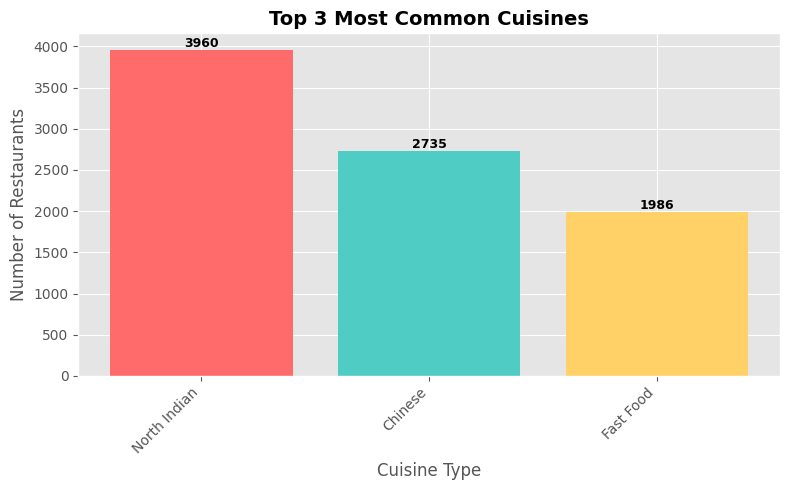

In [41]:
plt.figure(figsize=(8, 5))
color_palette = ['#FF6B6B', '#4FCDC4', '#FFD166'] # Corrected typo 'coler_palette' to 'color_palette'
plt.bar(top_cuisines.index, top_cuisines.values, color=color_palette) # Used .index for labels and .values for counts
plt.xticks(rotation=45, ha='right')
plt.title('Top 3 Most Common Cuisines', fontsize=14, fontweight='bold')
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
# Show values on top bars
for i, count in enumerate(top_cuisines.values): # Iterate over values of top_cuisines
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=9, fontweight='bold') # Adjusted text position and content
plt.tight_layout() # Added for better layout
plt.show()

Q2.the percentage of restaurent that serves each of the top cuisines

In [ ]:
percentage = (top_cuisines / len(df)) * 100
percentage

,count
Cuisines,
North Indian,41.461627
Chinese,28.635745
Fast Food,20.793634


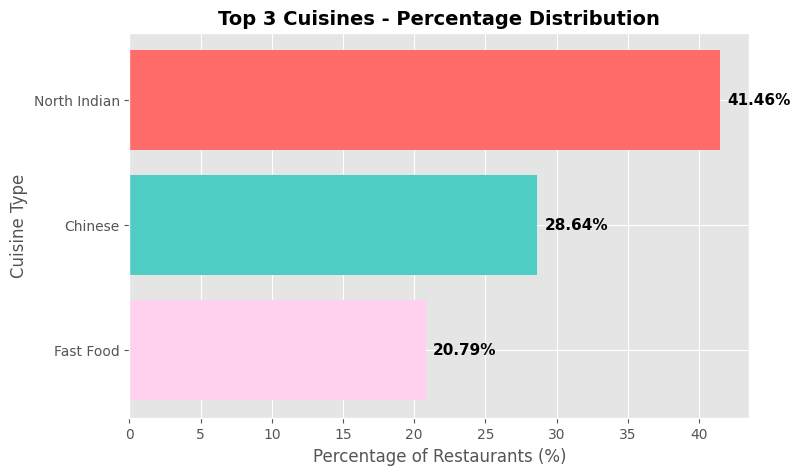

In [39]:
plt.figure(figsize=(8, 5))
colors =['#FF6B68', '#4ECDC4', '#FFD1EE'] # Fixed the stray quote and invalid hex code
plt.barh(percentage.index, percentage.values, color=colors) # Use percentage.index for labels and percentage.values for data
plt.xlabel("Percentage of Restaurants (%)", fontsize=12) # Capitalized 'P' for consistency
plt.ylabel("Cuisine Type", fontsize=12) # Fixed typo 'ylabol' to 'ylabel'
plt.title("Top 3 Cuisines - Percentage Distribution", fontsize=14, fontweight='bold')
for i, pct in enumerate(percentage.values): # Iterate through percentage values
  plt.text(pct + 0.5, i, f"{pct:.2f}%", va='center', fontsize=11, fontweight='bold') # Adjusted text position and format
plt.gca().invert_yaxis()
plt.show()

TASK 2:TASK:CITY ANALYSIS


Q1.CITIES WITH MOST RESTAURANTS

In [ ]:
city_counts = df['City'].value_counts()
city_counts.head()

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25


In [ ]:
city_counts.idxmax()

'New Delhi'

Q2. AVERAGE RATING PER CITY

In [ ]:
avg_rating_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
avg_rating_city.head()

,Aggregate rating
City,
Inner City,4.900000
Quezon City,4.800000
Makati City,4.650000
Pasig City,4.633333
Mandaluyong City,4.625000


Q3.CITY WITH HIGHEST AVERAGE RATING

In [48]:
print(avg_rating_city.sort_values(ascending=False).head(1))

City
Inner City    4.9
Name: Aggregate rating, dtype: float64


TASK3:PRICE RANGE DISTRUBUTION


Q1.CREATING A HISTOGRAM  OR BARCHAT TO VISUALIZE THE DISTRIBUTION OF THE PRICE RANGE

In [ ]:
price_counts = df['Price range'].value_counts().sort_index()
price_counts

,count
Price range,
1,4444
2,3113
3,1408
4,586


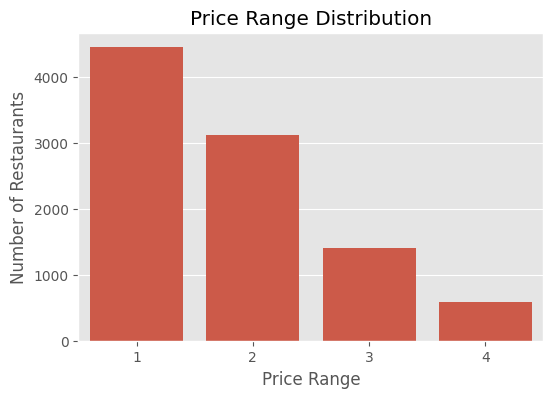

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=price_counts.index, y=price_counts.values)
plt.title("Price Range Distribution")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.show()

Q2.THE PERCENTAGE OF RESTAURANTS IN EACH PRICE RANGE CATEGORY

In [ ]:
price_percentage = (price_counts / len(df)) * 100
price_percentage

,count
Price range,
1,46.529159
2,32.593446
3,14.741912
4,6.135483


Q3.CREATING BAR CHART

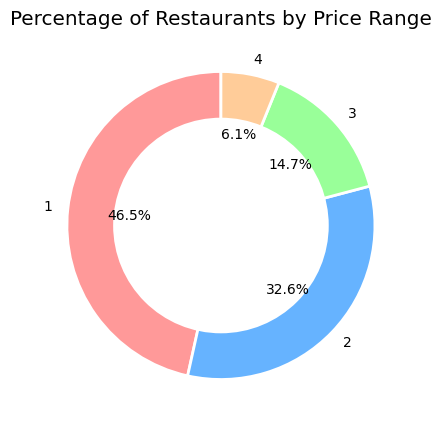

In [47]:
import matplotlib.pyplot as plt
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.figure(figsize=(5,5))
plt.pie(price_range_percentages, labels=price_range_percentages.index, autopct='%1.1f%%',
        colors=colors, startangle=90,
        wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'antialiased': True})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title("Percentage of Restaurants by Price Range")
plt.show()

TASK4.ONLINE DELIVERY


Q1.THE PERCENTAGE OF RESTAURENTS THAT OFFERS ONLINE DELIVERY

In [50]:
delivery_count = df['Has Online delivery'].value_counts()
print(delivery_count)

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64


Q2.AVERAGE RATINGS OF THE RESTAURENTS WITH AND WITHOUT  ONLINE DELIVERY

In [52]:
delivery_percentage = (delivery_count / len(df)) * 100
print(delivery_percentage)

Has Online delivery
No     74.337766
Yes    25.662234
Name: count, dtype: float64


Q3.COMPARING THE RATINGS

In [53]:
delivery_rating = df.groupby('Has Online delivery')['Aggregate rating'].mean()
print(delivery_rating)

Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64
